In [4]:
import numpy as np
import pandas as pd
from datasets import load_dataset

# Load the dataset from Hugging Face
dataset = load_dataset("WenhaoWang/VidProM")

# Convert dataset to pandas DataFrame
df = pd.DataFrame(dataset['train'])  # Ensure the correct split is used

In [5]:
# Display the first few rows of the dataframe
df.head(10)

,uuid,prompt,time,toxicity,obscene,identity_attack,insult,threat,sexual_explicit
0,6a83eb92-faa0-572b-9e1f-67dec99b711d,"Flying among clouds and stars, kitten Max disc...",Sun Sep 3 12:27:44 2023,0.00129,0.00016,0.00007,0.00064,0.00002,0.00002
1,3ba1adf3-5254-59fb-a13e-57e6aa161626,Use a clean and modern font for the text &quot...,Wed Sep 13 18:15:30 2023,0.00038,0.00013,0.00008,0.00018,0.00003,0.00003
2,f88d8fff-1c26-59d2-8252-23ee67762b12,dancing sticks .screen size must be 9:16,Thu Sep 21 18:00:43 2023,0.01793,0.00536,0.00105,0.00199,0.00048,0.00118
3,871c822c-2a73-5fa6-b4ff-67f821813be1,promt robots hugging,Fri Aug 18 04:47:26 2023,0.02472,0.00682,0.00056,0.00850,0.00182,0.00092
4,3cbb0e22-a3b4-5841-a5a1-12db24ae656a,"ridley scott space documentary, 2020",Sat Sep 2 22:50:12 2023,0.00046,0.01469,0.00226,0.01080,0.00080,0.00050
5,e9d2b31b-7c9b-5154-8b49-f5b8f92902e8,wide shot ostrich roaming Iceland,Thu Oct 19 09:07:17 2023,0.02580,0.00699,0.00143,0.00247,0.01966,0.00156
6,c80c659e-0215-5e90-88e8-0cbb40b05420,"a dark and ominous forest, heavy rain pouring ...",Sun Oct 8 23:33:08 2023,0.00118,0.00029,0.00014,0.00047,0.00004,0.00003
7,61c802f7-57a8-5408-affa-f3240d992e3b,video 4k Message: 1 Attachment,Mon Oct 9 14:09:56 2023,0.00035,0.01896,0.00301,0.01254,0.00120,0.00058
8,62e5a2a0-4994-5c75-9976-2416420526f7,"zoomed out, sideview of an Grey Alien sitting ...",Tue Oct 24 20:24:21 2023,0.01777,0.00029,0.00336,0.00256,0.00017,0.00005
9,1b83b6b3-7985-5410-9cef-a6a2cdb634d3,"giant army with swords and bows in the desert,...",Tue Oct 24 09:33:02 2023,0.01832,0.00278,0.00047,0.00376,0.00037,0.00054


In [6]:
df.columns

Index(['uuid', 'prompt', 'time', 'toxicity', 'obscene', 'identity_attack',
       'insult', 'threat', 'sexual_explicit'],
      dtype='object')

In [7]:
# making a df with only the prompts and video ids (uuid)
dd = df[['prompt', 'uuid']]
dd.head()

,prompt,uuid
0,"Flying among clouds and stars, kitten Max disc...",6a83eb92-faa0-572b-9e1f-67dec99b711d
1,Use a clean and modern font for the text &quot...,3ba1adf3-5254-59fb-a13e-57e6aa161626
2,dancing sticks .screen size must be 9:16,f88d8fff-1c26-59d2-8252-23ee67762b12
3,promt robots hugging,871c822c-2a73-5fa6-b4ff-67f821813be1
4,"ridley scott space documentary, 2020",3cbb0e22-a3b4-5841-a5a1-12db24ae656a


In [8]:
print(f"There are {len(dd['prompt'])} unique prompts")
# print(f"We wil start by sampling {np.floor(.0001 * len(dd['prompt']))} prompts")

There are 1672243 unique prompts


In [9]:
# choosing the first 100 prompts to start with
first = dd.head(100)
display(first)
for i, row in first.iterrows():
    print(f"Prompt: {row['prompt']}")
    pass

,prompt,uuid
0,"Flying among clouds and stars, kitten Max disc...",6a83eb92-faa0-572b-9e1f-67dec99b711d
1,Use a clean and modern font for the text &quot...,3ba1adf3-5254-59fb-a13e-57e6aa161626
2,dancing sticks .screen size must be 9:16,f88d8fff-1c26-59d2-8252-23ee67762b12
3,promt robots hugging,871c822c-2a73-5fa6-b4ff-67f821813be1
4,"ridley scott space documentary, 2020",3cbb0e22-a3b4-5841-a5a1-12db24ae656a
...,...,...
95,Make a breakdancing dragon,78484276-4ff2-59c4-b894-2eb7c6142603
96,Russian tourists in restaurants Sri Lanka Mes...,0df27c4b-7bb7-576c-adef-66542363c82c
97,"Mediaval age, Sharp features, cinematic, A old...",549a5812-3dcf-5839-8207-7124ea0f157b
98,Make the background and characters move,1634070d-3d72-556d-ad99-c47744fbfcfe


Prompt: Flying among clouds and stars, kitten Max discovered a world full of winged friends. Returning home, he shared his stories and everyone smiled as they imagined flying together in their dreams.  
Prompt: Use a clean and modern font for the text &quot;Relate Reality 101.&quot; Add a small, stylized heart icon or a thought bubble above or beside the text to represent emotions and thoughts. Consider using a color scheme that includes warm, inviting colors like deep reds, soft blues, or soothing purples to evoke feelings of connection and intrigue.  
Prompt: dancing sticks .screen size must be 9:16  
Prompt: promt robots hugging  
Prompt: ridley scott space documentary, 2020  
Prompt: wide shot ostrich roaming Iceland  
Prompt: a dark and ominous forest, heavy rain pouring down. Thunder rumbles in the distance as the camera pans through the wet, glistening leaves. fantastic,fairy, sureal, 4k, --ar 9:16  
Prompt: video 4k  Message: 1 Attachment  
Prompt: zoomed out, sideview of an Gr

## Notes
- can see that prompts have different formats 
    - some specifyu styles of videos, some specify screen size
- prompt length varies a LOT 
- not consistent capitalizization & some have symbols -- i.e &quot

/tmp/ipykernel_180876/1860406029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first['prompt_length'] = first['prompt'].apply(lambda x: len(x.split()))


count    100.000000
mean      15.040000
std       14.372336
min        1.000000
25%        6.000000
50%       11.500000
75%       17.000000
max       80.000000
Name: prompt_length, dtype: float64

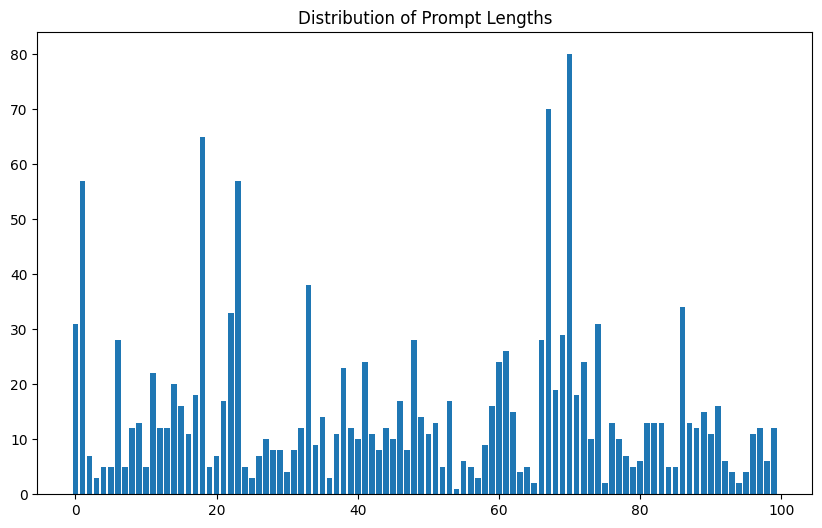

In [10]:
# adding length of prompt to the dataframe
first['prompt_length'] = first['prompt'].apply(lambda x: len(x.split()))
display(first['prompt_length'].describe())
# checking the distribution of prompt lengths
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.bar(range(len(first['prompt_length'])), first['prompt_length'])
plt.title('Distribution of Prompt Lengths')
plt.show()

## Watching the videos

I was struggluing to find the video from the uuid, so instead i found the uuid/prompt fromnt he video -- after downloading them 

In [11]:
from prompt_extractor import PromptExtractor

In [12]:
# Initialize the PromptExtractor
file_beginnings = ['t2vz-', 'pika-', 'vc-', 'ms-'] # these are the prefixes of the video files in the sample folder
pe = PromptExtractor(df, file_beginnings)

# Load in video names from folder 
video_folder = '/home/bia/Documents/genvid/sample_videos' # This is where the sample videos are stored
videos = pe.list_video_files(video_folder)
print(videos)
# pe.test(video_files)
# process the videos to extract prompts
sample_prompts = pe.process_video_files(videos)
# Display the first few extracted prompts
display(sample_prompts.head())
sample_prompts[sample_prompts['uuid'] == '0aa8113f-ee4a-5086-a7a6-e1c6d8b245aa'] # check for a specific uuid to see if it worked

['t2vz-0aa8113f-ee4a-5086-a7a6-e1c6d8b245aa.mp4', 'ms-00b62d63-510a-59e9-a694-cdf5a95ba537.mp4', 't2vz-0a1e22f6-5863-5c21-8514-78baee8d8a92.mp4', 'vc-0aa67e3c-ebc0-5667-a772-504be8e26bcf.mp4', 'pika-0a4d0ce2-8b90-5409-98da-a98cc46c363e.mp4', 'pika-0a0d4433-3116-5e2f-81e0-b35b2ec73ba3.mp4', 'ms-0b73d1b6-bf79-5a8f-abda-bdbc77b2e5be.mp4', 't2vz-0a1fa151-ae9e-5b84-9e1b-0d0b8024ade4.mp4', 't2vz-0a7dd8e7-9095-558c-b1b9-543b4514f5d2.mp4', 'pika-0a1a0fa2-0cbd-56d9-ab7a-7ffbf21d9e2c.mp4', 'ms-0aabc111-e517-5681-94d5-6c8f07859895.mp4', 'pika-0a3c36a4-ff51-5a17-a4ea-f545e1dc7f75.mp4', 'vc-00b7cb01-5d8b-5652-8633-4668238d52b5.mp4', 't2vz-0a6f8c06-69b4-5336-b957-caec839509dc.mp4', 'pika-0a2ab830-9ab2-5d5a-9964-bbb1a7274d39.mp4', 'pika-00a3d5c8-6c40-5881-8dc8-0ac9eed62b9e.mp4', 'pika-0a3a92fa-003b-5c8f-a518-592e5c6eb970.mp4', 'vc-0a3eef13-d33a-581c-8a3d-4c09f7df02df.mp4', 't2vz-0a40da8e-60ef-50be-8df3-d9423f2dab6c.mp4', 't2vz-0a850633-e1d4-5c2e-815e-d0f316d91c21.mp4', 'pika-0a0f5a43-f8ba-5afa-8210-5

,uuid,prefix,prompt
0,0aa8113f-ee4a-5086-a7a6-e1c6d8b245aa,t2vz-,"a elephant is walking in the forest, sunset -a..."
1,00b62d63-510a-59e9-a694-cdf5a95ba537,ms-,Draw a detailed colorful image showing the tra...
2,0a1e22f6-5863-5c21-8514-78baee8d8a92,t2vz-,"image of a sweet baby slumbering on a fluffy, ..."
3,0aa67e3c-ebc0-5667-a772-504be8e26bcf,vc-,a black and gold batman surrounded by three ba...
4,0a4d0ce2-8b90-5409-98da-a98cc46c363e,pika-,mother nature wearing a veil in front of a cro...


,uuid,prefix,prompt
0,0aa8113f-ee4a-5086-a7a6-e1c6d8b245aa,t2vz-,"a elephant is walking in the forest, sunset -a..."


### Notes

looking at the videos in the sample, we can see that 
- some videos are watermarked 
- the videos from t2vz are not the most realistic -- for example, a video uuid: 0a64622a-f379-5f6d-a7f5-4d8e9d561f37 from t2vz had prompt: Scene 7: Masked Dance  Brief snippets of hands and elegant clothing, showcasing the character dancing with different masked partners.  
looks like
<img src = "t2vz_mask_example.png" width = "200px"/>

### Was trying to preocess all tgar 1videos in my format -- quit early due to time constraints (had to process 80194 videos, 1/4 took 25 mins)

In [ ]:
file_beginnings = ['t2vz-', 'pika-', 'vc-', 'ms-'] # these are the prefixes of the video files in the sample folder
pe1 = PromptExtractor(df, file_beginnings)

video_folders = [
    '/home/bia/Documents/genvid/t2vz_videos_all',
    '/home/bia/Documents/genvid/pika_videos_all',
    '/home/bia/Documents/genvid/vc2_videos_all',
    '/home/bia/Documents/genvid/ms_videos_all',
]

videos = pe1.list_video_files_multi(video_folders)
print(f"there are {len(videos)} videos in the {len(video_folders)} folders")
# pe.test(video_files)
# process the videos to extract prompts
extracted_prompts = pe1.process_video_files(videos, csv_path='tar1.csv')
# Display the first few extracted prompts
extracted_prompts[extracted_prompts['uuid'] == '0aa8113f-ee4a-5086-a7a6-e1c6d8b245aa'] # check for a specific uuid to see if it worked

## Looking at the prompts
- using the prompts generated from the vdieos we can watch so we can see them all

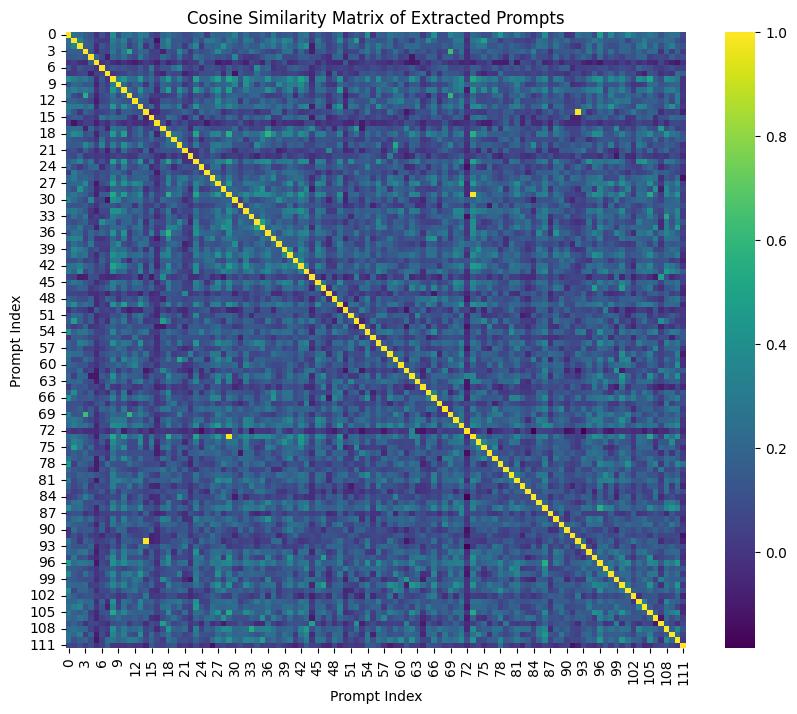

In [14]:
# do semantic similarity check on the extracted prompts
from sentence_transformers import SentenceTransformer, util
# Load a pre-trained sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')
# Encode the extracted prompts
prompt_list = sample_prompts['prompt'].tolist()
sample_embeddings = model.encode(prompt_list, convert_to_tensor=True)
# Calculate cosine similarity matrix
cosine_similarities = util.pytorch_cos_sim(sample_embeddings, sample_embeddings)
similarity_matrix = cosine_similarities.cpu().numpy()
# Display the cosine similarity matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap='viridis', annot=False)
plt.title('Cosine Similarity Matrix of Extracted Prompts')
plt.xlabel('Prompt Index')
plt.ylabel('Prompt Index')
plt.show()


In [16]:
# Get indices of the upper triangle (excluding the diagonal)
cosine_similarities = util.pytorch_cos_sim(sample_embeddings, sample_embeddings).cpu().numpy()
upper_triangle_indices = np.triu_indices(len(sample_prompts), k=1)
similarities = cosine_similarities[upper_triangle_indices]
indices = np.argsort(similarities)[::-1]  # Sort in descending order

top_n = 10  # Number of top similar prompts to display
print(f"Top {top_n} Most Similar Prompts:\n")
for i in indices[:top_n]:
    prompt_index1 = upper_triangle_indices[0][i]
    prompt_index2 = upper_triangle_indices[1][i]
    similarity_score = similarities[i]
    print(f"Similarity: {similarity_score:.4f}")
    print(f"  Prompt 1: {sample_prompts['prompt'].iloc[prompt_index1]}")
    print(f"  Prompt 2: {sample_prompts['prompt'].iloc[prompt_index2]}\n")

Top 10 Most Similar Prompts:

Similarity: 1.0000
  Prompt 1: a snake chasing a rat  
  Prompt 2: a snake chasing a rat  

Similarity: 1.0000
  Prompt 1: a old red locomotive that is smoking, from left to right, sc-fi, futuristic landscape, A breathtaking aerial view of a sprawling futuristic cityscape, with towering skyscrapers piercing the sky, sleek hovercars zooming through futuristic highways, and vibrant holographic billboards illuminating the streets below. Octane render, Unreal Engine, by Weta Digital, Cinematic, Photography, DSLR, Nikon D750, Short Exposure, F/2.8, Cool Color Palette, Kodachrome, 32k, Ultra-HD, Super-Resolution, HDR, DCI-P3, Natural Lighting, Flare, Cinematic Lighting, Contre-Jour, Beautiful Lighting, Ray Tracing Global Illumination, Ray Tracing Reflections, Ray Tracing Ambient Occlusion, RTX, CGI, VFX: insanely detailed and intricate, hypermaximalist, elegant, ornate, hyper realistic, super detailed,ar 16:9  
  Prompt 2: a old red locomotive that is smoking, f

In [ ]:
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sentence_transformers import SentenceTransformer

def cluster_prompts_with_index(extratced_prompts, num_clusters=5):
    """Clusters prompts and plots prompt indices with a separate key."""

    model = SentenceTransformer('all-MiniLM-L6-v2')
    embeddings = model.encode(extracted_prompts['prompt'].tolist())

    # K-means Clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans_labels = kmeans.fit_predict(embeddings)

    # Hierarchical Clustering
    hierarchical = AgglomerativeClustering(n_clusters=num_clusters)
    hierarchical_labels = hierarchical.fit_predict(embeddings)

    # Visualize with t-SNE
    tsne = TSNE(n_components=2, random_state=0)
    reduced_embeddings = tsne.fit_transform(embeddings)

    # Plot K-means clusters with prompt indices
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=kmeans_labels, cmap='viridis')
    plt.title("K-means Clusters (Prompt Indices)")
    for i in range(len(extracted_prompts)):
        plt.annotate(i, xy=(reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=8)

    # Plot Hierarchical clusters with prompt indices
    plt.subplot(1, 2, 2)
    scatter_hierarchical = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=hierarchical_labels, cmap='viridis')
    plt.title("Hierarchical Clusters (Prompt Indices)")
    for i in range(len(extracted_prompts)):
        plt.annotate(i, xy=(reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=8)

    plt.tight_layout()
    plt.show()

    # Print Prompt Index Key
    print("\nPrompt Index Key:")
    for i, prompt in enumerate(extracted_prompts['prompt'].tolist()):
        print(f"{i}: {prompt}")

# Example Usage:
# cluster_prompts_with_index(extracted_prompts, num_clusters=5)

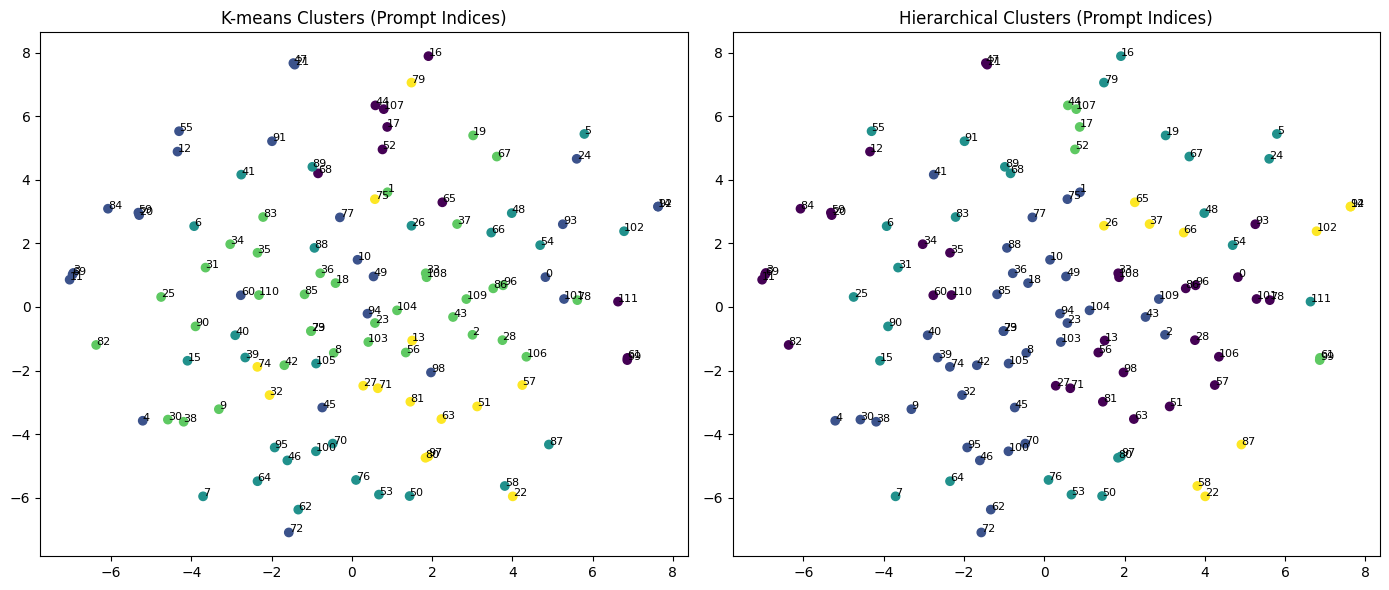


Prompt Index Key:
0: a elephant is walking in the forest, sunset -ar 16:9 -motion 2  
1: Draw a detailed colorful image showing the transformation of the Ugly Duckling into a beautiful swan.  Message: SWAN (Font: MODERN)  
2: image of a sweet baby slumbering on a fluffy, cotton-like cloud high above the earth. The cloud floats in a pastel-colored sky, and the baby is cradled in a celestial embrace, surrounded by a soft, dreamy aura.  
3: a black and gold batman surrounded by three bad people, night, cinematic  
4: mother nature wearing a veil in front of a cross headstone in a graveyard full of vines  
5: Grapefruit pulp cut into small pieces  
6: New York city  
7: a kid working in the garage building his own life size velociraptors robot kit modern space age trash  
8: Dense ancient forest, mist in the trees, sun rising, undergrowth dense, campfire in the distance, archer girl sitting by the fire, long brown hair, young face, wearing a split leather dress and trousers. Film style : 

In [19]:
cluster_prompts_with_index(sample_prompts, num_clusters=5)

In [21]:
import numpy as np
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer

nltk.download('punkt_tab')
nltk.download('stopwords')


def name_clusters(extracted_prompts, num_clusters=5):
    """Names clusters using keyword frequency and TF-IDF."""

    model = SentenceTransformer('all-MiniLM-L6-v2')
    embeddings = model.encode(extracted_prompts['prompt'].tolist())

    # K-means Clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(embeddings)
    print(f"Cluster labels assigned: {np.unique(cluster_labels)}") # Debugging line to check cluster labels

    clusters = [[] for _ in range(num_clusters)] # Initialize empty lists for each cluster
    # Group prompts by their cluster labels
    for i, label in enumerate(cluster_labels):
        clusters[label].append(extracted_prompts['prompt'].iloc[i])

    cluster_names = {}
    for cluster_id, prompt_list in enumerate(clusters):
        # Keyword Frequency Analysis
        all_words = []
        for prompt in prompt_list:
            tokens = nltk.word_tokenize(prompt.lower())
            stop_words = set(stopwords.words('english'))
            words = [word for word in tokens if word.isalnum() and word not in stop_words]
            all_words.extend(words)

        word_counts = Counter(all_words)
        keywords_freq = [word for word, count in word_counts.most_common(5)]  # Top 5 keywords

        # TF-IDF Analysis
        vectorizer = TfidfVectorizer()
        tfidf_matrix = vectorizer.fit_transform(prompt_list)
        tfidf_scores = np.array(tfidf_matrix.sum(axis=0)).flatten()
        tfidf_keywords_indices = tfidf_scores.argsort()[-5:][::-1]  # Top 5 TF-IDF keywords
        tfidf_keywords = [vectorizer.get_feature_names_out()[i] for i in tfidf_keywords_indices]

        # Combine keywords and generate name
        combined_keywords = list(set(keywords_freq + tfidf_keywords))
        cluster_name = " ".join(combined_keywords[:3])  # Use top 3 combined keywords

        cluster_names[cluster_id] = cluster_name

    return cluster_names, cluster_labels

def print_cluster_names_and_prompts(extracted_prompts, num_clusters=5):
    """Prints cluster names and the prompts belonging to each cluster."""

    cluster_names, cluster_labels = name_clusters(extracted_prompts, num_clusters)

    print("Cluster Names:")
    for cluster_id, name in cluster_names.items():
        print(f"Cluster {cluster_id}: {name}")

    print("\nPrompts per Cluster:")
    clusters = [[] for _ in range(num_clusters)]
    for i, label in enumerate(cluster_labels):
        clusters[label].append(extracted_prompts['prompt'].iloc[i])

    for cluster_id, prompt_list in enumerate(clusters):
        print(f"\nCluster {cluster_id} Prompts:")
        for prompt in prompt_list:
            print(f"- {prompt}")

# Example Usage:
print_cluster_names_and_prompts(sample_prompts, num_clusters=10)

[nltk_data] Downloading package punkt_tab to /home/bia/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/bia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cluster labels assigned: [0 1 2 3 4 5 6 7 8 9]
Cluster Names:
Cluster 0: con realista en
Cluster 1: quot body in
Cluster 2: cave in garage
Cluster 3: chasing snake dog
Cluster 4: realistic with in
Cluster 5: sitting giant in
Cluster 6: giza with of
Cluster 7: of flying sky
Cluster 8: into pieces small
Cluster 9: black 16 dark

Prompts per Cluster:

Cluster 0 Prompts:
- : 5g in mining industry  
- tierra girando en el centro de la pantalla con los continentes y formas bien definidas con una luz orbitando en &#233;l, hiper realista  
- The central focus of the design should be a group of marine lions, preferably in their natural habitat, such as the crystal-clear waters of the Gal&#225;pagos. Highlight their beauty and uniqueness.  
- calavera mejicana realista y colorida en ambiente oscuro de velas y libros con -motion 4  
- planet earth interconected for sustainable living  

Cluster 1 Prompts:
- fluormotion 4 -ar 16:9 -neg &quot;morphing, erratic fluctuation in motion, noisy, poor qua